# Principal component analysis (PCA)

1.   Standardize the continuous initial variables
2.   Compute the covariance matrix
3.   Compute the eigenvectors and eigenvalues of the covariance matrix
4.   Select the top-k eigenvectors by their corresponding eigenvalues
5.   Transform the original data along the axes of the principal component

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
from sklearn.decomposition import PCA

# Parameters

In [12]:
# The original data 
X = np.array(
    [[153, 56],
     [178, 54],
     [156, 115],
     [147, 41],
     [177, 104]]
)
k = 1  # Number of components to keep

In [13]:
X_to_print = pd.DataFrame(X, columns = ['x_1','x_2'])
print(f'The original data (i.e., matrix X):')
X_to_print
print(f'Number of components to keep = {k}')

The original data (i.e., matrix X):
Number of components to keep = 1


# 1.   Standardize the continuous initial variables

In [14]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
X_std_to_print = pd.DataFrame(X_std, columns = ['x_1_std','x_2_std'])
print(f'The standardised data (i.e., matrix X_std):')
print(f'x_1_std mean = {X_std_to_print["x_1_std"].mean():.2f}')
print(f'x_1_std std = {X_std_to_print["x_1_std"].std():.2f}')
print(f'x_2_std mean = {X_std_to_print["x_2_std"].mean():.2f}')
print(f'x_2_std std = {X_std_to_print["x_2_std"].std():.2f}')
X_std_to_print

The standardised data (i.e., matrix X_std):
x_1_std mean = 0.00
x_1_std std = 1.00
x_2_std mean = 0.00
x_2_std std = 1.00


,x_1_std,x_2_std
0,-0.641462,-0.543091
1,1.101641,-0.603434
2,-0.432289,1.237040
3,-1.059806,-0.995667
4,1.031917,0.905151


# 2.   Compute the covariance matrix
Bias = Normalization is by N or (N - 1). 

Rowvar = If rowvar is True (default), then each row represents a variable, with observations in the columns. Otherwise, the relationship is transposed: each column represents a variable, while the rows contain observations.

In [15]:
cov_mat = np.cov(X_std, rowvar=False, bias=False)
cov_mat_to_print = pd.DataFrame(cov_mat)
cov_mat_to_print

,0,1
0,1.000000,0.284525
1,0.284525,1.000000


# 3.   Compute the eigenvectors and eigenvalues of the covariance matrix

In [16]:
w, v = LA.eig(cov_mat)
idx = w.argsort()[::-1] # sort by Eigenvalues
w = w[idx]  # order as in idx
v = v[:,idx] # order as in idx
print(f'Eigenvalues: \n{w}\n')
print(f'Eigenvectors: \n{v.T}\n')

Eigenvalues: 
[1.28452478 0.71547522]

Eigenvectors: 
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]



# 4.   Select the top-k eigenvectors by their corresponding eigenvalues

In [17]:
selected_w = w.T[:k]
selected_V = v.T[:k]
print(f'Selected Eigenvalues: \n{selected_w}\n')
print(f'Selected Eigenvectors: \n{selected_V}\n')

Selected Eigenvalues: 
[1.28452478]

Selected Eigenvectors: 
[[0.70710678 0.70710678]]



# 5.   Transform the original data along the axes of the principal component

In [18]:
new_X = np.matmul(X_std, selected_V.T)
nex_X_to_print = pd.DataFrame(new_X, columns = ['PC1'])
print(f'Transformed PCA:')
nex_X_to_print

Transformed PCA:


,PC1
0,-0.837605
1,0.352285
2,0.569045
3,-1.453439
4,1.369714


# PCA (Sklearn)

**Q**: Does the sign of scores or of loadings in PCA have a meaning? 

**A**: PCA is a simple mathematical transformation. If you change the signs of the component(s), you do not change the variance that is contained in the first component. 

Read here: 
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [19]:
pca = PCA(n_components=k)
df = pd.DataFrame(X_std)
pcs=pca.fit_transform(df)
pcs_df = pd.DataFrame(data=pcs, columns=[f'PC{i+1}' for i in range(k)])
print(f'PCA using sklearn: \n{pcs_df}\n')
print(f'PCA Covariance Matrix: \n{pca.get_covariance()}\n')
print(f'Selected Eigenvalues: \n{pca.explained_variance_}\n')
print(f'Selected Eigenvectors: \n{pca.components_}\n')

PCA using sklearn: 
        PC1
0  0.837605
1 -0.352285
2 -0.569045
3  1.453439
4 -1.369714

PCA Covariance Matrix: 
[[1.         0.28452478]
 [0.28452478 1.        ]]

Selected Eigenvalues: 
[1.28452478]

Selected Eigenvectors: 
[[-0.70710678 -0.70710678]]



# Scree Plot

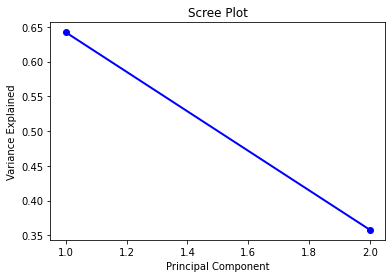

In [30]:
pca = PCA()
X_pca = pca.fit_transform(X_std)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()